Correlações entre variáveis quantitativas

In [3]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv("./base_ifood_limpa.csv", sep = ";", header=0).drop("Unnamed: 0", axis=1)

In [11]:
# Verificando informações gerais da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391674 entries, 0 to 391673
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   availableForScheduling  391674 non-null  bool   
 1   category                391674 non-null  object 
 2   delivery_fee            391674 non-null  float64
 3   delivery_time           391674 non-null  int64  
 4   distance                391674 non-null  float64
 5   minimumOrderValue       391674 non-null  float64
 6   price_range             391674 non-null  object 
 7   rating                  391674 non-null  float64
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 21.3+ MB


In [12]:
#Separando variáveis entre numéricas e categóricas
numericas = df.select_dtypes(include=["number"]).columns.tolist()
categoricas = df.select_dtypes(include=["object"]).columns.tolist()

In [16]:
#Uso da função "corr" para mostrar correlação. É importante lembrar que a correlação alta se dá quando os valores são próximos de +1 e -1. Em caso de resultado próximo a 0, a correlação é baixa. Por padrão, correlações fortes são aquelas acima de 0,7 ou 0,8.
df[numericas].corr()

,delivery_fee,delivery_time,distance,minimumOrderValue,rating
delivery_fee,1.000000,0.208230,0.724071,0.059945,0.030999
delivery_time,0.208230,1.000000,0.423321,0.025275,-0.138348
distance,0.724071,0.423321,1.000000,0.084524,-0.022032
minimumOrderValue,0.059945,0.025275,0.084524,1.000000,0.047161
rating,0.030999,-0.138348,-0.022032,0.047161,1.000000


In [18]:
#Utilização do pacote seaborn. É necessário que ele primeiro seja instalado no terminal, com a função pip
import seaborn as sns
import matplotlib.pyplot as plt

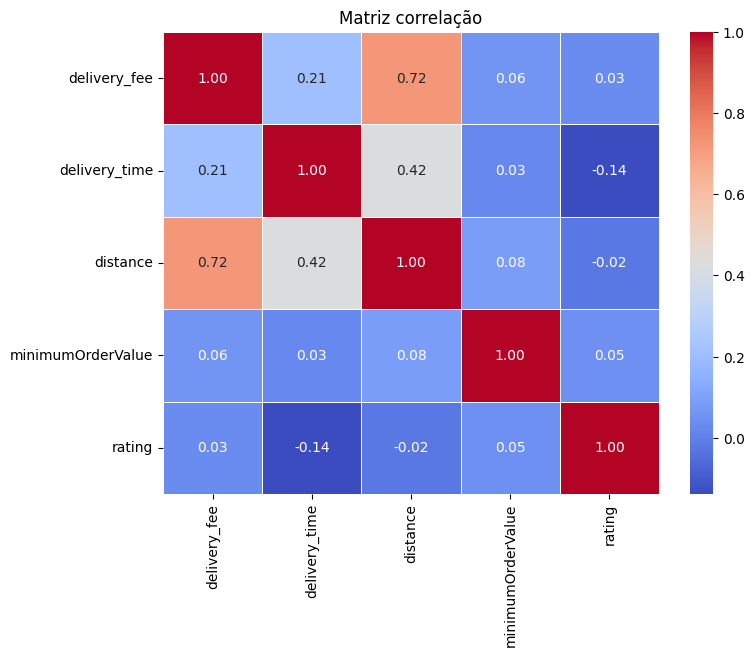

In [20]:
#Configurar o tamanho da figura
plt.figure(figsize=(8,6))

#Criar mapa de calor
sns.heatmap(df[numericas].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

#Adicionar Título
plt.title("Matriz correlação")
plt.show()


Correlações entre variáveis qualitativas (categóricas)

In [21]:
categoricas

['category', 'price_range']

In [22]:
#Para detalhar as categorias dentro de cada variável, utiliza-se a função "unique"
df["price_range"].unique()

array(['CHEAPEST', 'MODERATE', 'CHEAP', 'MOST_EXPENSIVE', 'EXPENSIVE'],
      dtype=object)

In [25]:
df["category"].unique()

array(['Marmita', 'Açaí', 'Bebidas', 'Carnes', 'Brasileira', 'Lanches',
       'Congelados', 'Pastel', 'Indiana', 'Árabe', 'Doces & Bolos',
       'Salgados', 'Italiana', 'Pizza', 'Típica do Norte', 'Hambúrguer',
       'Coreana', 'Japonesa', 'Mercado', 'Frangos', 'Cafeteria',
       'Padaria', 'Peixes', 'Saudável', 'Frutos Do Mar', 'Cozinha Rápida',
       'Variada', 'Nordestina', 'Conveniência', 'Sorvetes', 'Mexicana',
       'Portuguesa', 'Chinesa', 'Tapioca', 'Vegetariana', 'Africana',
       'Mineira', 'Sopas & Caldos', 'Argentina', 'Contemporânea',
       'Vegana', 'Peruana', 'Panqueca', 'Mediterrânea', 'Crepe',
       'Yakisoba', 'Alemã', 'Espanhola', 'Francesa', 'Baiana',
       'Presentes', 'Asiática', 'Congelados Fit', 'Colombiana',
       'Casa de Sucos', 'Tailandesa', 'Gaúcha', 'Paranaense', 'Xis',
       'Grega'], dtype=object)

In [27]:
#Checar a quantidade de categorias dentro da variável "categoria"
len(df["category"].unique())

60

In [38]:
#Como são muitas categorias, é necessário selecionar algumas para trabalhar. Será feito a partir da quantidade de registros em cada categoria.
df["category"].value_counts()

category
Lanches            96750
Brasileira         71638
Doces & Bolos      38706
Pizza              34393
Açaí               21824
Marmita            16332
Bebidas            12524
Japonesa           12370
Saudável            9500
Salgados            9423
Carnes              7922
Italiana            6450
Hambúrguer          6264
Sorvetes            5865
Pastel              5801
Padaria             4126
Variada             3935
Mercado             3077
Cafeteria           3076
Conveniência        2937
Árabe               2642
Cozinha Rápida      2445
Congelados          1918
Chinesa             1841
Frutos Do Mar       1275
Mexicana             845
Vegetariana          836
Vegana               631
Peixes               610
Frangos              561
Contemporânea        534
Francesa             487
Casa de Sucos        351
Argentina            345
Sopas & Caldos       299
Portuguesa           288
Mineira              262
Nordestina           258
Tapioca              240
Crepe           

In [43]:
#Utilização do filtro para selecionar apenas as categorias "Salgados, Açaí e Japonesa"
df_categorias_selecionadas = df[df["category"].isin(["Salgados", "Açaí", "Japonesa"])]
df_categorias_selecionadas

,availableForScheduling,category,delivery_fee,delivery_time,distance,minimumOrderValue,price_range,rating
1,False,Açaí,7.99,61,4.96,10.0,CHEAPEST,0.00000
26,False,Salgados,12.49,60,5.19,20.0,CHEAPEST,0.00000
63,False,Salgados,8.99,55,4.80,20.0,CHEAP,0.00000
65,False,Japonesa,0.00,39,3.96,25.0,CHEAPEST,0.00000
93,False,Salgados,3.00,40,3.24,10.0,CHEAPEST,0.00000
...,...,...,...,...,...,...,...,...
391660,False,Açaí,5.00,40,1.68,15.0,CHEAPEST,4.57143
391663,False,Açaí,5.00,50,2.56,13.0,CHEAPEST,4.05882
391669,False,Açaí,9.00,60,3.53,30.0,CHEAPEST,4.95000
391670,False,Açaí,6.00,50,2.60,10.0,CHEAPEST,0.00000


Tabela de Contigência

Usada para resumir e analisar a relação entre duas ou mais variáveis categóricas. Visa entender se há associação entre elas.

In [46]:
#Criação da tabela de contingência
contingency_table = pd.crosstab(df_categorias_selecionadas["category"], df_categorias_selecionadas["price_range"])
contingency_table

price_range,CHEAP,CHEAPEST,EXPENSIVE,MODERATE,MOST_EXPENSIVE
category,,,,,
Açaí,1952,19453,43,359,17
Japonesa,926,5199,2027,2787,1431
Salgados,1151,7347,107,797,21


In [47]:
#O próximo passo é fazer a contagem geral de registros em cada categoria
contingency_table.sum(axis=1)

category
Açaí        21824
Japonesa    12370
Salgados     9423
dtype: int64

In [52]:
#O próximo passo é utilizar a função "div" para calcular a porcentagem de cada categoria
contingency_table.div(contingency_table.sum(axis=1), axis=0)

price_range,CHEAP,CHEAPEST,EXPENSIVE,MODERATE,MOST_EXPENSIVE
category,,,,,
Açaí,0.089443,0.891358,0.001970,0.016450,0.000779
Japonesa,0.074859,0.420291,0.163864,0.225303,0.115683
Salgados,0.122148,0.779688,0.011355,0.084580,0.002229


Correlações entre variáveis quali e quanti

In [71]:
#Selecionando algumas categorias para trabalhar
categories_to_use = ["Lanches", "Brasileira", "Doces & Bolos", "Pizza", "Açaí"]

In [72]:
df_tmp = df[df["category"].isin(categories_to_use)]

In [74]:
df_tmp.groupby("category")["minimumOrderValue"].agg(["mean", "std"])

,mean,std
category,,
Açaí,10.029079,4.759467
Brasileira,15.166077,7.061473
Doces & Bolos,10.435906,4.461472
Lanches,14.587576,7.459041
Pizza,17.591943,9.349869


<Axes: xlabel='category'>

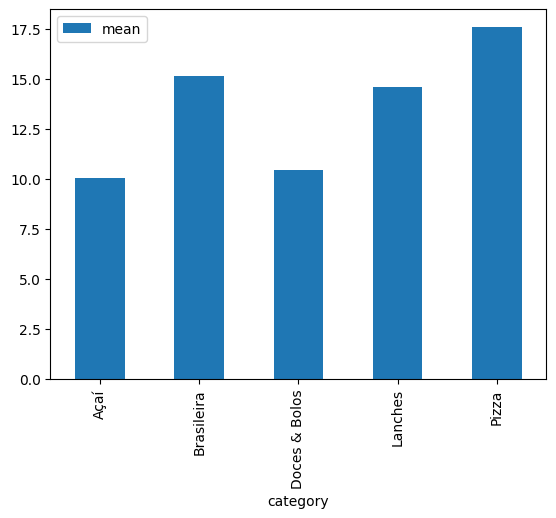

In [76]:
#criação de gráfico diretamente no pandas
df_tmp.groupby("category")["minimumOrderValue"].agg(["mean"]).plot.bar()

<Axes: title={'center': 'minimumOrderValue'}, xlabel='category'>

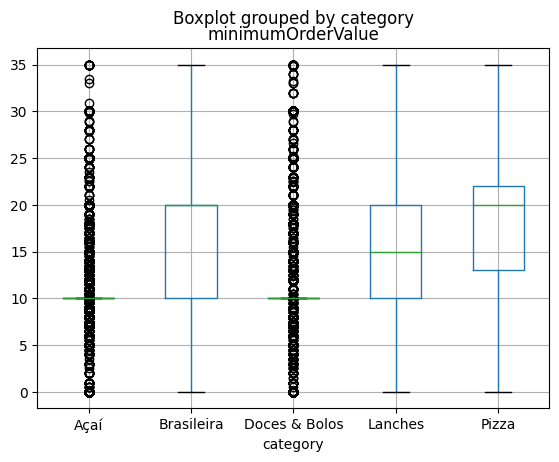

In [78]:
df_tmp.boxplot(column="minimumOrderValue", by="category")

In [79]:
#Relação entre tipo de preço e taxa de cobrança e tempo de entrega
df.groupby("price_range")[["delivery_fee", "delivery_time"]].agg(["mean"])

,delivery_fee,delivery_time
,mean,mean
price_range,,
CHEAP,6.319747,46.115655
CHEAPEST,6.643133,46.650156
EXPENSIVE,8.096070,45.311963
MODERATE,6.971140,46.003002
MOST_EXPENSIVE,9.394744,45.372359
